In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
percentile_list = [50,55,60,70,75,80,90]
alpha_list = [0.5,0.55,0.6,0.7,0.75,0.8,0.9]
percentile_default = 75
alpha_default = 0.75

dp_name = "dp1_0.05_dp2_0"
performance_file_name = "performance_tmp.csv"
output_path = "best_pref"

In [30]:
# 先查看不同的percentile对模型性能的影响
for percentile in percentile_list:
    # path = f"result_LA_percentile_{percentile}_alpha_{alpha_default}"
    # path_performance = os.path.join(path,dp_name,performance_file_name)
    path = 'result_LA_no_threshold/dp1_0.05_dp2_0/performance_tmp.csv'
    performance = pd.read_csv(path)
    performance = performance[(performance['network_type'] == 'cpd')]
    performance.index = range(performance.shape[0])
    report_df = performance[['weight_decay', 'drop_p_prior', 'drop_p_kki', 'cv']].drop_duplicates().copy()
    report_df.index = range(report_df.shape[0])
    report_df['AUPRC'] = 0.0
    report_df['R2'] = 0.0
    for index, row in report_df.iterrows():
        tmp = performance.loc[(performance['weight_decay'] == row['weight_decay'])&\
                            (performance['drop_p_prior'] == row['drop_p_prior'])&\
                            (performance['drop_p_kki'] == row['drop_p_kki'])&\
                            (performance['cv'] == row['cv'])]
        max_r2_row = tmp.loc[tmp['val_r2'].idxmax()]
        report_df.at[index,'AUPRC'] = max_r2_row['AUPRC']
        report_df.at[index,'R2'] = max_r2_row['val_r2']
    report_df_group = report_df.groupby(['weight_decay', 'drop_p_prior', "drop_p_kki"])[['AUPRC', 'R2']].mean()
    output = os.path.join(output_path,f"no_change_alpha_percentile.csv")
    report_df_group.to_csv(output)
        
    

In [29]:
# 先查看不同的percentile对模型性能的影响
for percentile in percentile_list:
    path = f"result_LA_percentile_{percentile}_alpha_{alpha_default}"
    path_performance = os.path.join(path,dp_name,performance_file_name)
    performance = pd.read_csv(path_performance)
    performance = performance[(performance['network_type'] == 'cpd')]
    performance.index = range(performance.shape[0])
    report_df = performance[['weight_decay', 'drop_p_prior', 'drop_p_kki', 'cv']].drop_duplicates().copy()
    report_df.index = range(report_df.shape[0])
    report_df['AUPRC'] = 0.0
    report_df['R2'] = 0.0
    for index, row in report_df.iterrows():
        tmp = performance.loc[(performance['weight_decay'] == row['weight_decay'])&\
                            (performance['drop_p_prior'] == row['drop_p_prior'])&\
                            (performance['drop_p_kki'] == row['drop_p_kki'])&\
                            (performance['cv'] == row['cv'])]
        max_r2_row = tmp.loc[tmp['val_r2'].idxmax()]
        report_df.at[index,'AUPRC'] = max_r2_row['AUPRC']
        report_df.at[index,'R2'] = max_r2_row['val_r2']
    report_df_group = report_df.groupby(['weight_decay', 'drop_p_prior', "drop_p_kki"])[['AUPRC', 'R2']].mean()
    output = os.path.join(output_path,f"percentile_{percentile}.csv")
    report_df_group.to_csv(output)
        
    

In [28]:
report_df_group

,,,AUPRC,R2
weight_decay,drop_p_prior,drop_p_kki,,
1.000000e-10,0.05,0,0.226438,0.777306
1.000000e-07,0.05,0,0.229335,0.775824
1.000000e-04,0.05,0,0.253851,0.772586
1.000000e-01,0.05,0,0.335630,0.617668


In [5]:
percentile_result = pd.DataFrame()
for percentile in percentile_list:
    tmp = pd.read_csv(f"best_pref/percentile_{percentile}.csv",index_col = False)
    tmp['percentile'] = percentile
    percentile_result = pd.concat([percentile_result,tmp],ignore_index = True)

In [7]:
percentile_result.to_csv('percentile_result.csv')

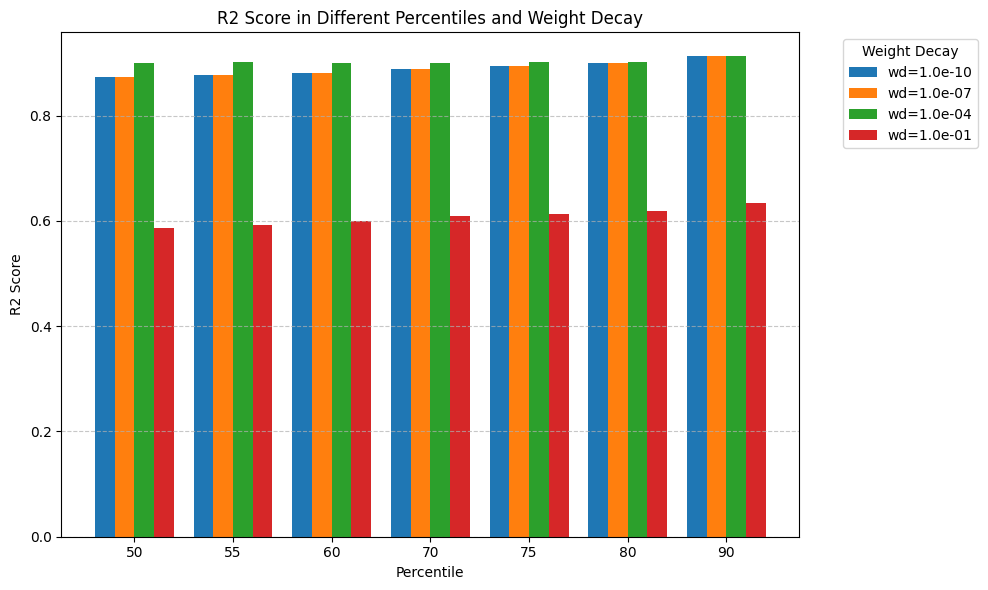

In [19]:
percentile_result['percentile'] = percentile_result['percentile'].astype(str)
pivot_data = percentile_result.pivot_table(index='percentile', columns='weight_decay', values='R2')
x = np.arange(len(pivot_data.index))
bar_width = 0.2
positions = [x + i * bar_width for i in range(len(pivot_data.columns))]
fig, ax = plt.subplots(figsize=(10, 6))
for i, (col, pos) in enumerate(zip(pivot_data.columns, positions)):
    ax.bar(pos, pivot_data[col], bar_width, label=f'wd={col:.1e}')

ax.set_xticks(x + (len(pivot_data.columns) - 1) * bar_width / 2)
ax.set_xticklabels(pivot_data.index)
ax.set_xlabel('Percentile')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score in Different Percentiles and Weight Decay')
ax.legend(title='Weight Decay', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

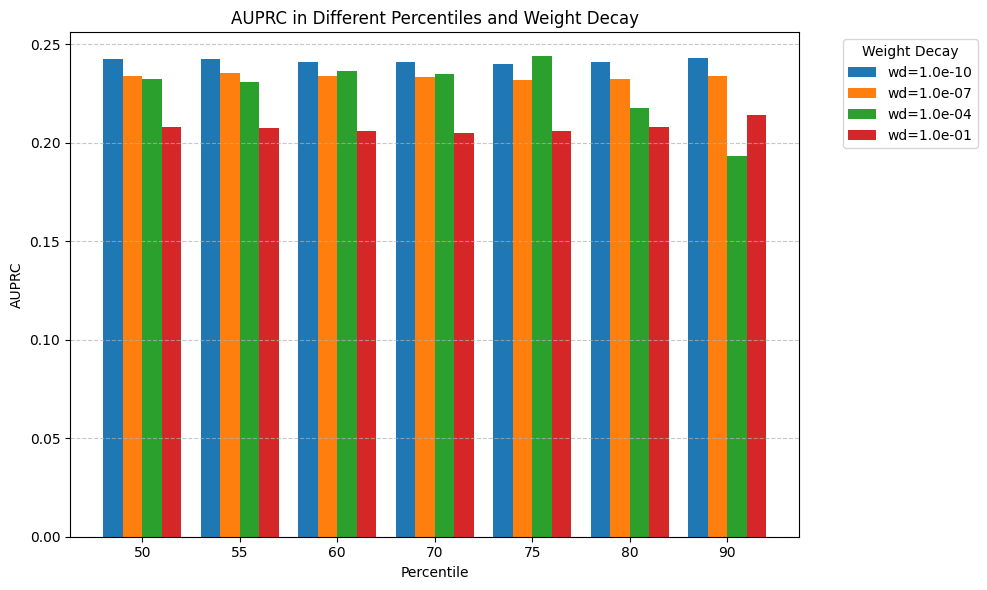

In [20]:
percentile_result['percentile'] = percentile_result['percentile'].astype(str)
pivot_data = percentile_result.pivot_table(index='percentile', columns='weight_decay', values='AUPRC')
x = np.arange(len(pivot_data.index))
bar_width = 0.2
positions = [x + i * bar_width for i in range(len(pivot_data.columns))]
fig, ax = plt.subplots(figsize=(10, 6))
for i, (col, pos) in enumerate(zip(pivot_data.columns, positions)):
    ax.bar(pos, pivot_data[col], bar_width, label=f'wd={col:.1e}')

ax.set_xticks(x + (len(pivot_data.columns) - 1) * bar_width / 2)
ax.set_xticklabels(pivot_data.index)
ax.set_xlabel('Percentile')
ax.set_ylabel('AUPRC')
ax.set_title('AUPRC in Different Percentiles and Weight Decay')
ax.legend(title='Weight Decay', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

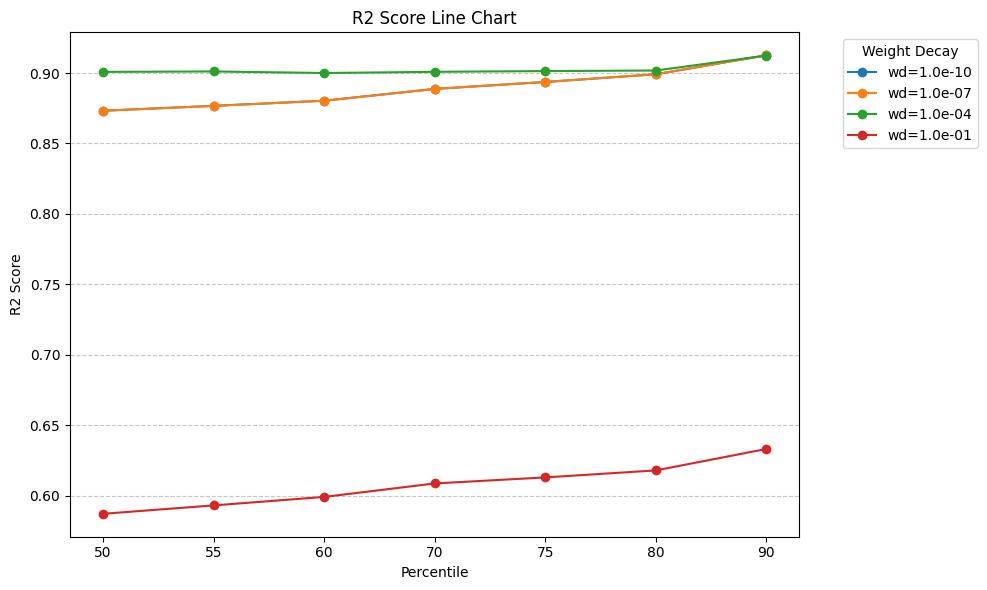

In [22]:
percentile_result['percentile'] = percentile_result['percentile'].astype(str)
pivot_data = percentile_result.pivot_table(index='percentile', columns='weight_decay', values='R2')
fig, ax = plt.subplots(figsize=(10, 6))
for col in pivot_data.columns:
    ax.plot(pivot_data.index, pivot_data[col], marker='o', label=f'wd={col:.1e}')

ax.set_xlabel('Percentile')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score Line Chart')
ax.legend(title='Weight Decay', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [13]:
# 再查看不同的alpha对模型性能的影响
for alpha in alpha_list:
    path = f"result_LA_percentile_{percentile_default}_alpha_{alpha}"
    path_performance = os.path.join(path,dp_name,performance_file_name)
    performance = pd.read_csv(path_performance)
    performance = performance[(performance['network_type'] == 'cpd')]
    performance.index = range(performance.shape[0])
    report_df = performance[['weight_decay', 'drop_p_prior', 'drop_p_kki', 'cv']].drop_duplicates().copy()
    report_df.index = range(report_df.shape[0])
    report_df['AUPRC'] = 0.0
    report_df['R2'] = 0.0
    for index, row in report_df.iterrows():
        tmp = performance.loc[(performance['weight_decay'] == row['weight_decay'])&\
                            (performance['drop_p_prior'] == row['drop_p_prior'])&\
                            (performance['drop_p_kki'] == row['drop_p_kki'])&\
                            (performance['cv'] == row['cv'])]
        max_r2_row = tmp.loc[tmp['val_r2'].idxmax()]
        report_df.at[index,'AUPRC'] = max_r2_row['AUPRC']
        report_df.at[index,'R2'] = max_r2_row['val_r2']
    report_df_group = report_df.groupby(['weight_decay', 'drop_p_prior', "drop_p_kki"])[['AUPRC', 'R2']].mean()
    output = os.path.join(output_path,f"alpha_{alpha}.csv")
    report_df_group.to_csv(output)
        
    

In [14]:
alpha_result = pd.DataFrame()
for alpha in alpha_list:
    tmp = pd.read_csv(f"best_pref/alpha_{alpha}.csv",index_col = False)
    tmp['alpha'] = alpha
    alpha_result = pd.concat([alpha_result,tmp],ignore_index = True)

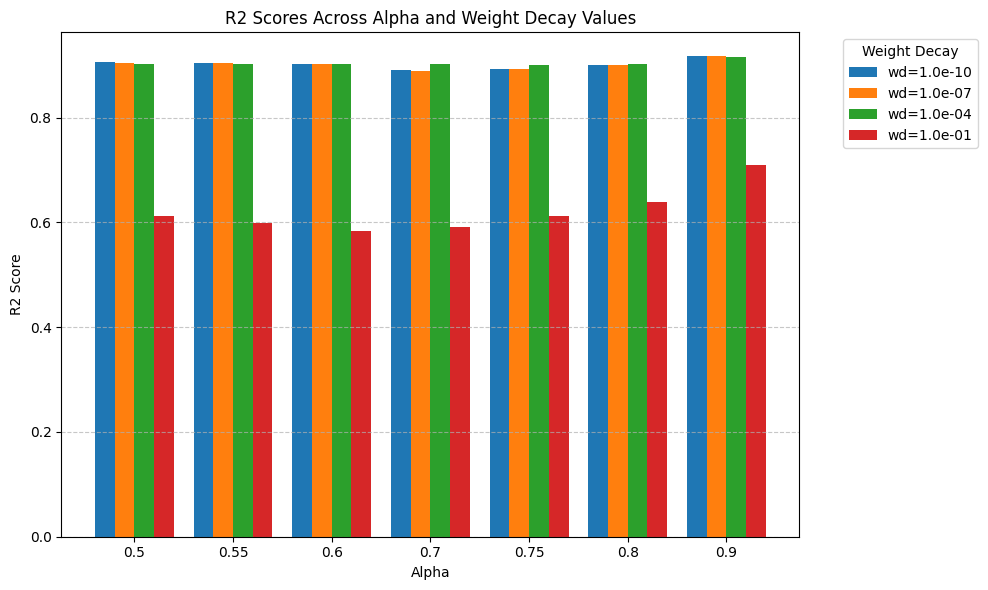

In [23]:
alpha_result['alpha'] = alpha_result['alpha'].astype(str)
pivot_data = alpha_result.pivot_table(index='alpha', columns='weight_decay', values='R2')
x = np.arange(len(pivot_data.index))
bar_width = 0.2
positions = [x + i * bar_width for i in range(len(pivot_data.columns))]
fig, ax = plt.subplots(figsize=(10, 6))
for i, (col, pos) in enumerate(zip(pivot_data.columns, positions)):
    ax.bar(pos, pivot_data[col], bar_width, label=f'wd={col:.1e}')

ax.set_xticks(x + (len(pivot_data.columns) - 1) * bar_width / 2)
ax.set_xticklabels(pivot_data.index)
ax.set_xlabel('Alpha')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score in Different Alpha and Weight Decay')
ax.legend(title='Weight Decay', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

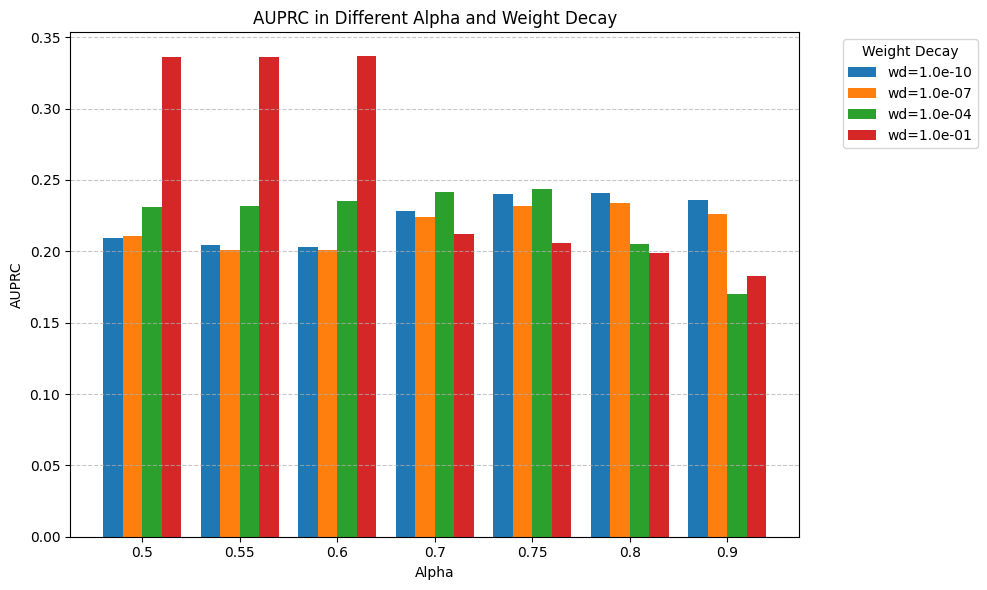

In [25]:
alpha_result['alpha'] = alpha_result['alpha'].astype(str)
pivot_data = alpha_result.pivot_table(index='alpha', columns='weight_decay', values='AUPRC')
x = np.arange(len(pivot_data.index))
bar_width = 0.2
positions = [x + i * bar_width for i in range(len(pivot_data.columns))]
fig, ax = plt.subplots(figsize=(10, 6))
for i, (col, pos) in enumerate(zip(pivot_data.columns, positions)):
    ax.bar(pos, pivot_data[col], bar_width, label=f'wd={col:.1e}')

ax.set_xticks(x + (len(pivot_data.columns) - 1) * bar_width / 2)
ax.set_xticklabels(pivot_data.index)
ax.set_xlabel('Alpha')
ax.set_ylabel('AUPRC')
ax.set_title('AUPRC in Different Alpha and Weight Decay')
ax.legend(title='Weight Decay', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

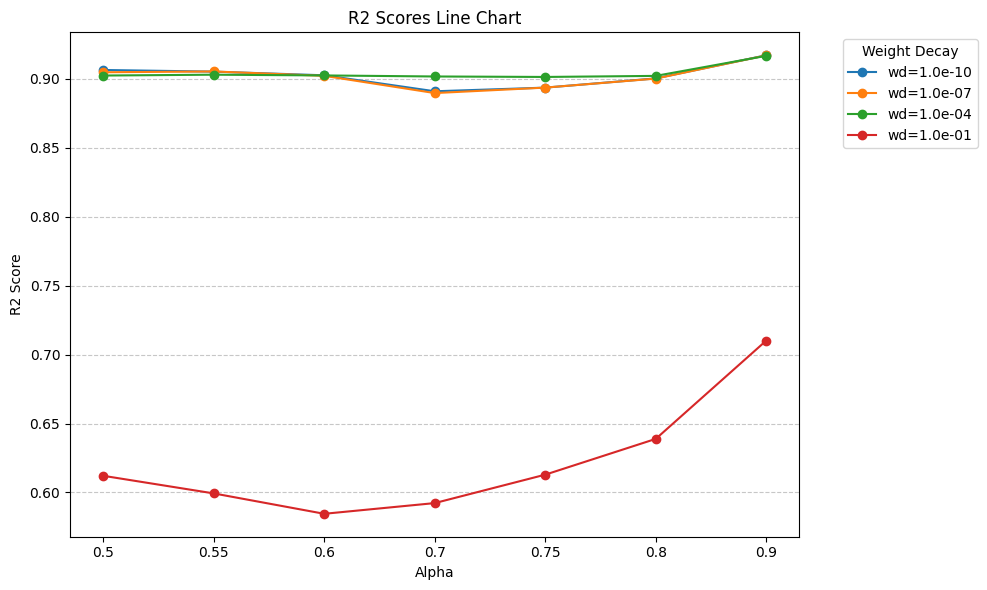

In [24]:
alpha_result['alpha'] = alpha_result['alpha'].astype(str)
pivot_data = alpha_result.pivot_table(index='alpha', columns='weight_decay', values='R2')
fig, ax = plt.subplots(figsize=(10, 6))
for col in pivot_data.columns:
    ax.plot(pivot_data.index, pivot_data[col], marker='o', label=f'wd={col:.1e}')

ax.set_xlabel('Alpha')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Scores Line Chart')
ax.legend(title='Weight Decay', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()